# Create Datasets

We have written several pre-made datasets based on [PyG's dataset specifications](https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html) and provide easy ways to help you build the subsets of data you need!

In [1]:
from qm9star_query.dataset.base_dataset import BaseQM9starDataset
from qm9star_query.dataset.sub_datasets import (
    NeutralQM9starDataset,
    CationQM9starDataset,
    AnionQM9starDataset,
    RadicalQM9starDataset,
)

from torch_geometric.data import Data
import torch


def transform_data(raw_data):
    return Data(
        pos=torch.tensor(raw_data["coords"], dtype=torch.float32),
        z=torch.tensor(raw_data["atoms"], dtype=torch.int64),
        energy=torch.tensor(
            raw_data["single_point_energy"], dtype=torch.float32),
        y=torch.tensor(raw_data["single_point_energy"], dtype=torch.float32),
        energy_grad=-torch.tensor(raw_data["forces"], dtype=torch.float32),
        formal_charges=torch.tensor(
            raw_data["formal_charges"], dtype=torch.int64),
        formal_num_radicals=torch.tensor(
            raw_data["formal_num_radicals"], dtype=torch.int64
        ),
        bonds=torch.tensor(raw_data["bonds"], dtype=torch.int64),
        mulliken_charge=torch.tensor(
            raw_data["mulliken_charge"], dtype=torch.float32),
        spin_densities=torch.tensor(
            raw_data["spin_densities"], dtype=torch.float32),
        zpve=torch.tensor(raw_data["zpve"], dtype=torch.float32),
        energy_correction=torch.tensor(
            raw_data["energy_correction"], dtype=torch.float32
        ),
        enthalpy_correction=torch.tensor(
            raw_data["enthalpy_correction"], dtype=torch.float32
        ),
        gibbs_free_energy_correction=torch.tensor(
            raw_data["gibbs_free_energy_correction"], dtype=torch.float32
        ),
        U_0=torch.tensor(raw_data["U_0"], dtype=torch.float32),
        U_T=torch.tensor(raw_data["U_T"], dtype=torch.float32),
        H_T=torch.tensor(raw_data["H_T"], dtype=torch.float32),
        G_T=torch.tensor(raw_data["G_T"], dtype=torch.float32),
        S=torch.tensor(raw_data["S"], dtype=torch.float32),
        Cv=torch.tensor(raw_data["Cv"], dtype=torch.float32),
        rotation_consts=torch.tensor(
            raw_data["rotation_consts"], dtype=torch.float32),
        isotropic_polarizability=torch.tensor(
            raw_data["isotropic_polarizability"], dtype=torch.float32
        ),
        electronic_spatial_extent=torch.tensor(
            raw_data["electronic_spatial_extent"], dtype=torch.float32
        ),
        alpha_homo=torch.tensor(raw_data["alpha_homo"], dtype=torch.float32),
        alpha_lumo=torch.tensor(raw_data["alpha_lumo"], dtype=torch.float32),
        alpha_gap=torch.tensor(raw_data["alpha_gap"], dtype=torch.float32),
    )

As with several of the dataset classes imported above, the `BaseQM9starDataset` class is a base class that is not recommended to be used directly. Instead, you should use one of the subclasses that are defined in the `qm9star_query.dataset.sub_datasets` module, or create your own subclass of `BaseQM9starDataset`.

If you are using these dataset classes for the first time, you must specify the PostgreSQL database instance to which you need to connect in the initialisation. How to deploy it is described in the [download_and_deploy_qm9star](1-download_and_deploy_qm9star.md).

After executing the following code, a subset of the specified range will be downloaded from the QM9star database and cached in npz format. The dataset will then execute the `process` method to transform each piece of data into a tensor based on the `transform` function passed in.You can replace the `transform` function as per your requirement.

In [2]:
neutral_dataset = NeutralQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_neutral",
    block_num=5,
    log=True,
    transform=transform_data,
)

In [6]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(
    neutral_dataset, batch_size=32, shuffle=True, num_workers=0, follow_batch=["nxyz"]
)
for batch in train_loader:
    print(batch["batch"])
    break

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 

In [5]:
cation_dataset = CationQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_cation",
    block_num=5,
    log=True,
    transform=transform_data,
)

./raw/qm9star_cation_chunk00.npz saved


./raw/qm9star_cation_chunk01.npz saved


./raw/qm9star_cation_chunk02.npz saved


./raw/qm9star_cation_chunk03.npz saved


./raw/qm9star_cation_chunk04.npz saved
processing ./processed/qm9star_cation_chunk00_processed.pt


Processing...


./processed/qm9star_cation_chunk00_processed.pt saved
processing ./processed/qm9star_cation_chunk01_processed.pt
./processed/qm9star_cation_chunk01_processed.pt saved
processing ./processed/qm9star_cation_chunk02_processed.pt
./processed/qm9star_cation_chunk02_processed.pt saved
processing ./processed/qm9star_cation_chunk03_processed.pt
./processed/qm9star_cation_chunk03_processed.pt saved
processing ./processed/qm9star_cation_chunk04_processed.pt
./processed/qm9star_cation_chunk04_processed.pt saved


Done!


In [6]:
anion_dataset = AnionQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_anion",
    block_num=5,
    log=True,
    transform=transform_data,
)

./raw/qm9star_anion_chunk00.npz saved


./raw/qm9star_anion_chunk01.npz saved


./raw/qm9star_anion_chunk02.npz saved


./raw/qm9star_anion_chunk03.npz saved


./raw/qm9star_anion_chunk04.npz saved
processing ./processed/qm9star_anion_chunk00_processed.pt


Processing...


./processed/qm9star_anion_chunk00_processed.pt saved
processing ./processed/qm9star_anion_chunk01_processed.pt
./processed/qm9star_anion_chunk01_processed.pt saved
processing ./processed/qm9star_anion_chunk02_processed.pt
./processed/qm9star_anion_chunk02_processed.pt saved
processing ./processed/qm9star_anion_chunk03_processed.pt
./processed/qm9star_anion_chunk03_processed.pt saved
processing ./processed/qm9star_anion_chunk04_processed.pt
./processed/qm9star_anion_chunk04_processed.pt saved


Done!


In [7]:
radical_dataset = RadicalQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_radical",
    block_num=5,
    log=True,
    transform=transform_data,
)

./raw/qm9star_radical_chunk00.npz saved


./raw/qm9star_radical_chunk01.npz saved


./raw/qm9star_radical_chunk02.npz saved


./raw/qm9star_radical_chunk03.npz saved


./raw/qm9star_radical_chunk04.npz saved
processing ./processed/qm9star_radical_chunk00_processed.pt


Processing...


./processed/qm9star_radical_chunk00_processed.pt saved
processing ./processed/qm9star_radical_chunk01_processed.pt
./processed/qm9star_radical_chunk01_processed.pt saved
processing ./processed/qm9star_radical_chunk02_processed.pt
./processed/qm9star_radical_chunk02_processed.pt saved
processing ./processed/qm9star_radical_chunk03_processed.pt
./processed/qm9star_radical_chunk03_processed.pt saved
processing ./processed/qm9star_radical_chunk04_processed.pt
./processed/qm9star_radical_chunk04_processed.pt saved


Done!


In [3]:
neutral_dataset[0]

Data(y=[1], pos=[15, 3], z=[15], energy=[1], energy_grad=[15, 3], formal_charges=[15], formal_num_radicals=[15], bonds=[15, 3])

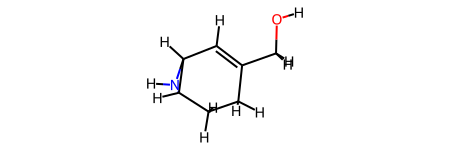

In [5]:
neutral_dataset.get_rdmol(100000)

In [11]:
total_dataset = BaseQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_all",
    block_num=5,
    log=True,
    transform=transform_data,
)

In [4]:
from sqlmodel import Session, col, create_engine, func, select

from qm9star_query.models import Formula, Molecule, Snapshot

scheme = "postgresql+psycopg2"
POSTGRES_USER = "hxchem"
POSTGRES_PASSWD = "hxchem"
POSTGRES_SERVER = "127.0.0.1"
POSTGRES_PORT = 35432
POSTGRES_DB = "qm9star"

engine = create_engine(
    f"{scheme}://{POSTGRES_USER}:{POSTGRES_PASSWD}@{POSTGRES_SERVER}:{POSTGRES_PORT}/{POSTGRES_DB}"
)
session = Session(engine)

In [13]:
snaps = session.exec(select(Snapshot).where(Snapshot.is_TS == True)).all()

In [15]:
len(snaps)

1222

In [8]:
def delete_snapshot(
    *,
    session: Session,
    snapshot_id: int,
) -> Snapshot:
    db_snapshot = session.get(Snapshot, snapshot_id)
    db_molecule = session.get(Molecule, db_snapshot.molecule_id)
    db_molecule.snapshot_ids = [
        snapshot_id
        for snapshot_id in db_molecule.snapshot_ids
        if snapshot_id != snapshot_id
    ]
    db_molecule.snapshot_number = db_molecule.snapshot_number - 1
    session.add(db_molecule)
    session.delete(db_snapshot)
    session.commit()
    return Snapshot

In [16]:
for snap in snaps:
    delete_snapshot(session=session, snapshot_id=snap.id)

In [18]:
len(total_dataset)

2011964

In [22]:
total_dataset.U_T

tensor([-132.1043, -224.6220, -155.2765,  ..., -422.4995, -349.3400,
        -400.1524])

In [21]:
total_dataset.U_0.mean()

tensor(-408.3981)

In [64]:
import pandas as pd

total_df = pd.DataFrame(
    {"energy(Hartree)": total_dataset.energy, "gap(Hartree)": total_dataset.alpha_gap}
)
total_df["class"] = "total"

neutral_df = pd.DataFrame(
    {
        "energy(Hartree)": neutral_dataset.energy,
        "gap(Hartree)": neutral_dataset.alpha_gap,
    }
)
neutral_df["class"] = "neutral"

cation_df = pd.DataFrame(
    {"energy(Hartree)": cation_dataset.energy, "gap(Hartree)": cation_dataset.alpha_gap}
)
cation_df["class"] = "cation"

anion_df = pd.DataFrame(
    {"energy(Hartree)": anion_dataset.energy, "gap(Hartree)": anion_dataset.alpha_gap}
)
anion_df["class"] = "anion"

radical_df = pd.DataFrame(
    {
        "energy(Hartree)": radical_dataset.energy,
        "gap(Hartree)": radical_dataset.alpha_gap,
    }
)
radical_df["class"] = "radical"

df = pd.concat([neutral_df, cation_df, anion_df, radical_df]).reset_index(drop=True)

In [65]:
df

,energy(Hartree),gap(Hartree),class
0,-454.149689,0.25996,neutral
1,-376.329956,0.19819,neutral
2,-339.636932,0.17901,neutral
3,-326.030396,0.28679,neutral
4,-340.830017,0.24059,neutral
...,...,...,...
2011959,-347.423676,0.10031,radical
2011960,-347.423096,0.10125,radical
2011961,-387.999390,0.04673,radical
2011962,-387.999390,0.04671,radical


In [66]:
import seaborn as sns
from matplotlib import pyplot as plt

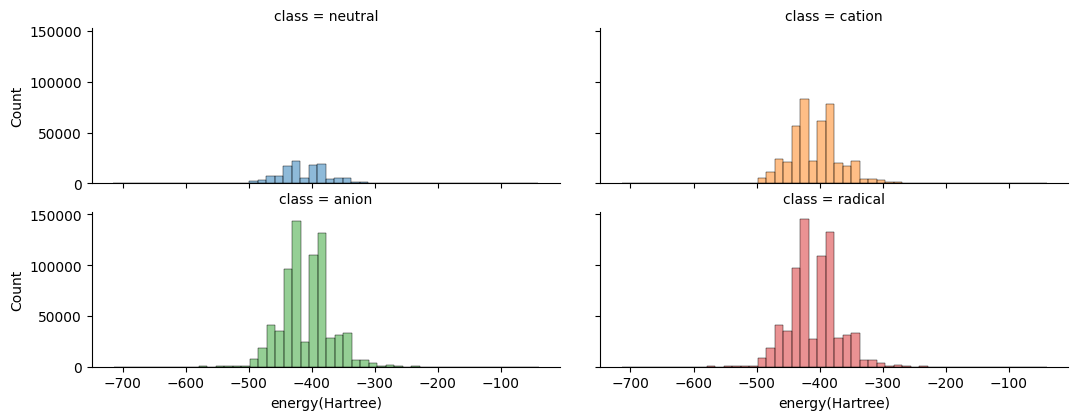

In [67]:
sns.set_context({"figure.figsize": [20, 10]})
g = sns.FacetGrid(df, col="class", hue="class", col_wrap=2)
g = g.map(sns.histplot, "energy(Hartree)", bins=50, alpha=0.5)
g.figure.set_size_inches(12, 4)

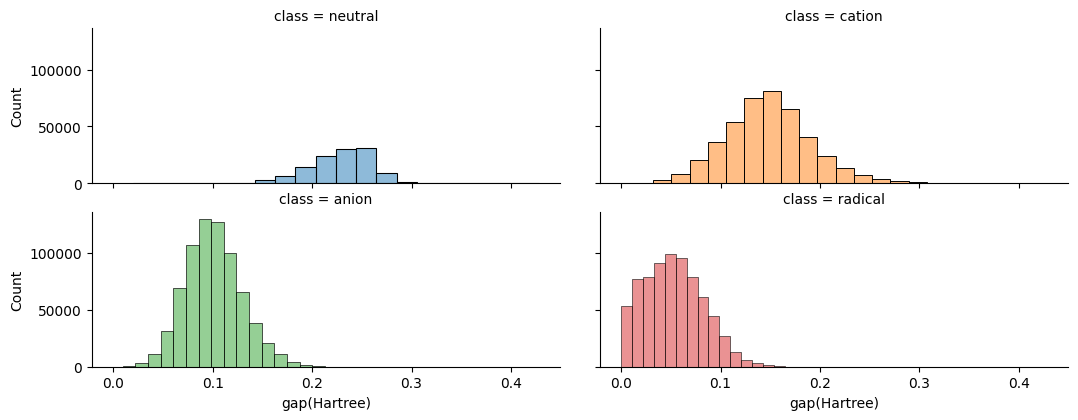

In [68]:
g = sns.FacetGrid(df, col="class", hue="class", col_wrap=2)
g = g.map(sns.histplot, "gap(Hartree)", bins=20, alpha=0.5)
g.figure.set_size_inches(12, 4)